# Import Libraries

In [1]:
# Basic libraries
import pymysql
import pandas as pd # data manipulatioN
import numpy as np # numerical operations
import matplotlib.pyplot as plt # 2D visualizations
import seaborn as sns # high-resolution visualization
import plotly.express as px #Visualization
import warnings # warning messages management
from scipy.stats import norm
from scipy import stats

## Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder # label encoding
from sklearn.model_selection import train_test_split # splitting data into train/test sets
from sklearn.linear_model import LinearRegression # Linear Regression
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error #LR metrics
from sklearn.linear_model import LogisticRegression # logistic model
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, cohen_kappa_score # logistic metrics
from sklearn.neighbors import KNeighborsRegressor #KNN
from sklearn import metrics # more metrics
from sklearn.preprocessing import Normalizer #SKlearn is the library for machine learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings
%matplotlib inline

In [44]:
#Import data from the file 
data1 = pd.read_excel("Sources/regression_data.xls")
data1.sample(10)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
15388,2791500280,2014-11-19,3,2.50,1650,6675,1.0,0,0,3,8,1290,360,1990,0,98023,47.2899,-122.372,1880,6675,246000
4605,8141300300,2015-02-07,4,2.50,2019,4435,2.0,0,3,3,8,2019,0,2008,0,98022,47.1958,-121.974,1950,4800,293000
14562,3811000230,2015-03-16,4,2.25,2390,57599,2.0,0,0,3,8,2390,0,1981,0,98053,47.6651,-122.067,2390,38186,589000
9181,5100402644,2014-11-19,4,1.50,1430,6380,1.5,0,0,4,7,1130,300,1945,0,98115,47.6942,-122.319,1570,6380,525000
14482,5249802520,2014-08-05,5,2.75,2160,7200,1.5,0,0,3,7,1220,940,1955,0,98118,47.5576,-122.273,1900,7200,402000
10732,3905060070,2014-08-29,4,2.50,2080,8504,2.0,0,0,3,8,2080,0,1991,0,98029,47.5703,-121.998,2000,6773,545000
2857,3222079162,2014-08-13,3,2.00,1760,43575,1.0,0,0,3,7,1160,600,1988,0,98010,47.3565,-121.940,1760,46038,322000
4979,1443550020,2015-05-06,4,2.50,2640,11816,2.0,0,0,3,8,2640,0,1999,0,98019,47.7330,-121.968,2400,11816,570000
20962,7227801581,2014-05-07,3,2.50,1600,3573,2.0,0,0,3,7,1600,0,2013,0,98056,47.5070,-122.181,1500,11089,305450
2431,6413100270,2015-03-31,3,1.75,1540,9000,1.0,0,0,3,8,1540,0,1971,0,98125,47.7152,-122.322,1710,7488,490000


In [45]:
#Standarize column names. Good practise
cols = [col_name.lower().replace(' ', '_') for col_name in data1.columns]
data1.columns = cols
data1.sample(2)
data1['id'] = data1['id'].astype(str)
# Good practice to set ID as the index
data1.set_index("id", inplace=True)

In [46]:
#Convert dates  
data1['date'] = pd.to_datetime(data1['date'], format='%Y')
#No need to put year built into date. it Could be useful as a numeric for our model
#data1['yr_built'] = pd.to_datetime(data1['yr_built'], format='%Y')
##the same with year renovated we use this as a numerical discrete and 0 are no renovations
#Idea change yr renovated to a column saying renovated yes or no to simplify
##data1['yr_renovated'] = pd.to_datetime(data1['yr_renovated'], format='%Y')

#Use the metric system. 
data1['sqft_lot'] = data1['sqft_lot'].apply(lambda x: x*0.092903)
data1['sqft_living'] = data1['sqft_living'].apply(lambda x: x*0.092903)
data1['sqft_above'] = data1['sqft_above'].apply(lambda x: x*0.092903)
data1['sqft_basement'] = data1['sqft_basement'].apply(lambda x: x*0.092903)
data1['sqft_living15'] = data1['sqft_living15'].apply(lambda x: x*0.092903)
data1['sqft_lot15'] = data1['sqft_lot15'].apply(lambda x: x*0.092903)
data1

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,3,1.00,109.62554,524.901950,1.0,0,0,3,7,109.62554,0.00000,1955,0,98178,47.5112,-122.257,124.49002,524.901950,221900
6414100192,2014-12-09,3,2.25,238.76071,672.803526,2.0,0,0,3,7,201.59951,37.16120,1951,1991,98125,47.7210,-122.319,157.00607,709.686017,538000
5631500400,2015-02-25,2,1.00,71.53531,929.030000,1.0,0,0,3,6,71.53531,0.00000,1933,0,98028,47.7379,-122.233,252.69616,748.983986,180000
2487200875,2014-12-09,4,3.00,182.08988,464.515000,1.0,0,0,5,7,97.54815,84.54173,1965,0,98136,47.5208,-122.393,126.34808,464.515000,604000
1954400510,2015-02-18,3,2.00,156.07704,750.656240,1.0,0,0,3,8,156.07704,0.00000,1987,0,98074,47.6168,-122.045,167.22540,697.051209,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,2014-05-21,3,2.50,142.14159,105.073293,3.0,0,0,3,8,142.14159,0.00000,2009,0,98103,47.6993,-122.346,142.14159,140.190627,360000
6600060120,2015-02-23,4,2.50,214.60593,540.045139,2.0,0,0,3,8,214.60593,0.00000,2014,0,98146,47.5107,-122.362,170.01249,668.901600,400000
1523300141,2014-06-23,2,0.75,94.76106,125.419050,2.0,0,0,3,7,94.76106,0.00000,2009,0,98144,47.5944,-122.299,94.76106,186.456321,402101


In [47]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   bedrooms       21597 non-null  int64         
 2   bathrooms      21597 non-null  float64       
 3   sqft_living    21597 non-null  float64       
 4   sqft_lot       21597 non-null  float64       
 5   floors         21597 non-null  float64       
 6   waterfront     21597 non-null  int64         
 7   view           21597 non-null  int64         
 8   condition      21597 non-null  int64         
 9   grade          21597 non-null  int64         
 10  sqft_above     21597 non-null  float64       
 11  sqft_basement  21597 non-null  float64       
 12  yr_built       21597 non-null  int64         
 13  yr_renovated   21597 non-null  int64         
 14  zipcode        21597 non-null  int64         
 15  lat       

>Remove outliers from price. three first rows

In [49]:
data1=data1.sort_values('price',ascending=False)
data1.head(20)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,,,,,,,,,,,,,,,,,,,,
6762700020,2014-10-13,6,8.00,1119.48115,2564.122800,2.5,0,3,4,13,796.17871,323.30244,1910,1987,98102,47.6298,-122.323,366.03782,817.546400,7700000
9808700762,2014-06-11,5,4.50,932.74612,3467.604475,2.0,1,2,3,11,713.49504,219.25108,1940,2001,98004,47.6500,-122.214,365.10879,2364.288447,7060000
9208900037,2014-09-19,6,7.75,918.81067,2914.738722,2.0,0,4,3,13,823.12058,95.69009,2001,0,98039,47.6305,-122.240,421.77962,3969.745190,6890000
2470100110,2014-08-04,5,5.75,854.70760,3258.015307,2.0,0,0,3,13,575.99860,278.70900,2001,0,98039,47.6289,-122.233,330.73468,2261.723535,5570000
8907500070,2015-04-13,5,5.00,743.22400,2228.278455,2.0,0,4,3,12,624.30816,118.91584,2009,0,98004,47.6232,-122.220,427.35380,2020.640250,5350000
7558700030,2015-04-13,6,6.00,686.55317,2306.688587,2.0,1,4,4,12,464.51500,222.03817,1991,0,98040,47.5631,-122.210,401.34096,2287.178957,5300000
1247600105,2014-10-20,5,5.25,744.15303,4228.665851,2.0,1,4,3,12,556.48897,187.66406,1999,0,98033,47.6767,-122.211,318.65729,2488.685564,5110000
1924059029,2014-06-17,5,6.75,895.58492,1214.056404,1.0,1,4,3,12,447.79246,447.79246,1983,2009,98040,47.5570,-122.210,303.79281,971.207962,4670000
7738500731,2014-08-15,5,5.50,616.87592,3717.420642,2.0,1,4,3,12,589.93405,26.94187,2004,0,98155,47.7493,-122.280,281.49609,2174.673424,4500000


In [50]:
data1.shape
data1=data1[data1['price']<5000000]
data1.shape

(21590, 20)

In [51]:
data1.head(10)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,,,,,,,,,,,,,,,,,,,,
1924059029,2014-06-17,5,6.75,895.58492,1214.056404,1.0,1,4,3,12,447.79246,447.79246,1983,2009,98040,47.5570,-122.210,303.79281,971.207962,4670000
7738500731,2014-08-15,5,5.50,616.87592,3717.420642,2.0,1,4,3,12,589.93405,26.94187,2004,0,98155,47.7493,-122.280,281.49609,2174.673424,4500000
3835500195,2014-06-18,4,3.00,597.36629,2556.411851,2.0,0,0,3,12,597.36629,0.00000,2001,0,98004,47.6208,-122.219,345.59916,1355.640576,4490000
6065300370,2015-05-06,5,6.00,691.19832,2001.130620,2.0,0,0,3,12,515.61165,175.58667,2003,0,98006,47.5692,-122.189,440.36022,1795.722087,4210000
6447300265,2014-10-14,4,5.50,657.75324,1539.681419,2.0,0,0,3,12,535.12128,122.63196,2008,0,98039,47.6151,-122.224,291.71542,1486.076388,4000000
8106100105,2014-11-14,4,4.25,536.05031,1978.833900,2.0,1,4,4,11,536.05031,0.00000,1980,0,98040,47.5850,-122.222,429.21186,2113.357444,3850000
853200010,2014-07-01,5,5.50,654.96615,3979.964520,1.0,0,2,4,13,401.34096,253.62519,1978,0,98004,47.6229,-122.220,471.01821,1911.014710,3800000
2303900100,2014-09-11,3,4.25,511.89553,3251.605000,2.0,0,4,3,13,456.15373,55.74180,1997,0,98177,47.7296,-122.370,318.65729,4208.691706,3800000
7397300170,2014-05-30,4,3.50,515.61165,2608.530434,2.0,0,2,4,12,311.22505,204.38660,2000,0,98039,47.6395,-122.234,276.85094,1821.084606,3710000


In [52]:
data1.shape
data1=data1[data1['bedrooms']<10]
data1.shape

(21585, 20)

In [53]:
data1=data1.sort_values('bedrooms',ascending=False)
data1.head(10)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,,,,,,,,,,,,,,,,,,,,
8823901445,2015-03-13,9,3.00,261.98646,416.205440,2.0,0,0,3,7,174.65764,87.32882,1918,0,98105,47.6654,-122.307,228.541380,408.773200,934000
9822700190,2014-08-08,9,4.50,339.09595,464.515000,2.0,0,0,3,8,235.04459,104.05136,1915,2010,98105,47.6604,-122.289,233.186530,464.515000,1280000
8823900290,2015-03-17,9,4.00,429.21186,511.709724,2.5,0,0,3,11,359.53461,69.67725,1915,0,98105,47.6684,-122.309,251.767130,401.340960,1400000
1997200215,2014-05-07,9,4.50,355.81849,649.206164,2.5,0,0,3,7,227.61235,128.20614,1938,0,98103,47.6927,-122.338,135.638380,584.452773,599999
2902200015,2015-01-06,9,3.00,341.88304,408.773200,2.0,0,0,3,7,262.91549,78.96755,1908,0,98102,47.6374,-122.324,182.089880,227.612350,700000
424049043,2014-08-11,9,7.50,376.25715,604.241112,2.0,0,0,3,7,376.25715,0.00000,1996,0,98144,47.5923,-122.301,134.523544,359.162998,450000
3756900027,2014-11-25,8,3.00,356.74752,1485.518970,1.0,0,0,3,7,235.04459,121.70293,1961,0,98034,47.7111,-122.211,128.206140,759.203316,575000
7418000130,2014-12-11,8,3.25,399.48290,970.000223,2.0,0,0,4,8,260.12840,139.35450,1979,0,98059,47.4786,-122.131,165.367340,971.486671,430000
6746700615,2015-03-18,8,2.50,211.81884,278.709000,1.5,0,0,3,7,112.41263,99.40621,1911,0,98105,47.6675,-122.316,149.573830,278.709000,700000


In [62]:
#Split dataframe into numerical, categorical, date, boolean and target
numericals_continuous_df=data1[['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']]
numericals_discrete_df=data1[['bedrooms','bathrooms','floors','view','condition','grade','yr_built','yr_renovated']]
categorical_df=data1[['bedrooms','bathrooms','floors','view','condition','grade','yr_built','yr_renovated']]
boolean_df=data1[['waterfront']]
date_df=data1.select_dtypes(include=["datetime"])
Target_df=data1[['price']]#Dont Normalize or transform

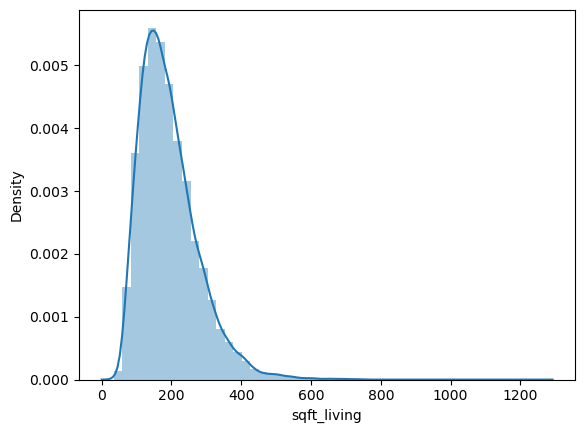

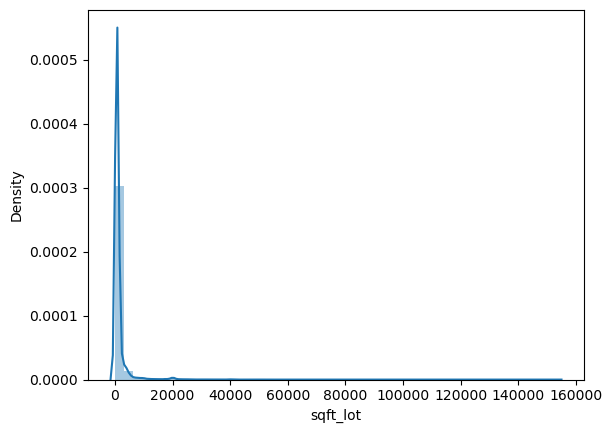

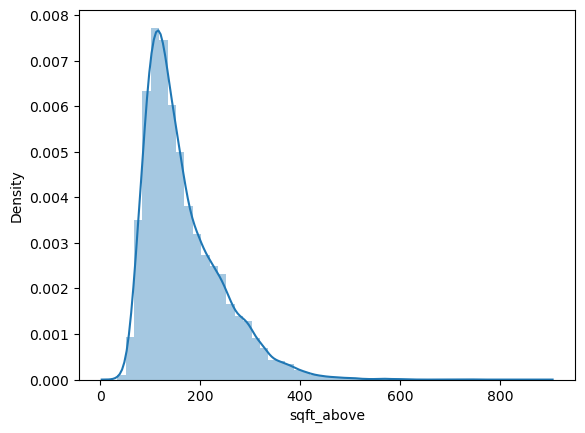

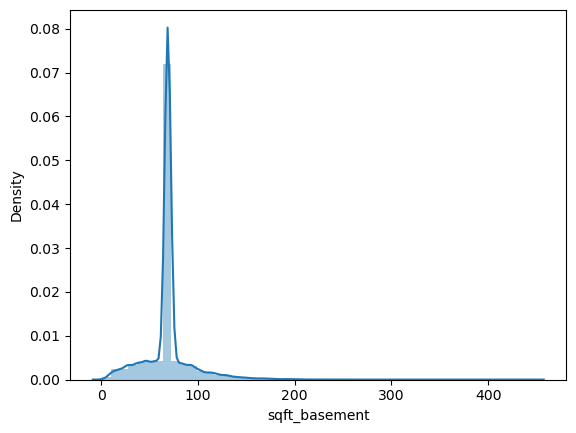

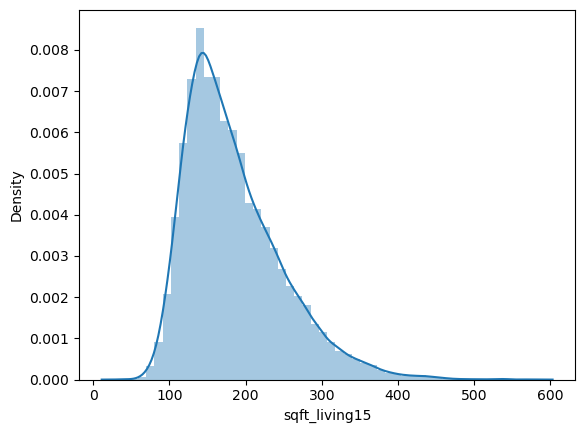

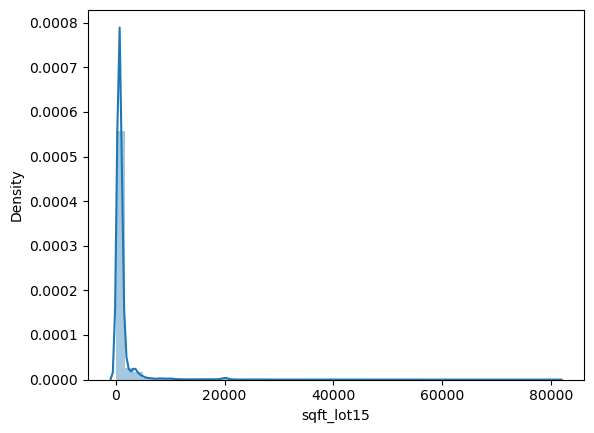

In [64]:
#Show the distributions in as a normal distribution. 
##There are different methods to do this transformation
#I use with BOX-COX Transformation
X_num_BC=numericals_continuous_df


for column in X_num_BC.columns:
    X_num_BC[column] = np.where(X_num_BC[column]<=0, np.NAN, X_num_BC[column]) # data['HV1'].mean()
    X_num_BC[column] = X_num_BC[column].fillna(X_num_BC[column].mean())
    transformed_data, _ci = stats.boxcox(X_num_BC[column])
numericals_continuous_df =X_num_BC   
# Print the dristribution plots for the numerical values. 
for column in X_num_BC.columns:
    sns.distplot(X_num_BC[column])
    plt.show()

In [55]:
#Show the distributions in as a normal distribution. Due to skewness to the left
#I use Log Transformation

def log_transfom_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN # or with np.NAN to change it to the mean afterwards with .fillna()

for column in numericals_continuous_df.columns:
    numericals_continuous_df[column] = list(map(log_transfom_clean, numericals_continuous_df[column])) #Transformation
    numericals_continuous_df[column] = numericals_continuous_df[column].fillna(np.mean(numericals_continuous_df[column]))    #Clean NAN
    

In [65]:
prepared_data=pd.concat([numericals_continuous_df,numericals_discrete_df,categorical_df,boolean_df,Target_df],axis=1)
prepared_data = prepared_data.reset_index(drop=True)

In [66]:
prepared_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21585 entries, 0 to 21584
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sqft_living    21585 non-null  float64
 1   sqft_lot       21585 non-null  float64
 2   sqft_above     21585 non-null  float64
 3   sqft_basement  21585 non-null  float64
 4   sqft_living15  21585 non-null  float64
 5   sqft_lot15     21585 non-null  float64
 6   bedrooms       21585 non-null  int64  
 7   bathrooms      21585 non-null  float64
 8   floors         21585 non-null  float64
 9   view           21585 non-null  int64  
 10  condition      21585 non-null  int64  
 11  grade          21585 non-null  int64  
 12  yr_built       21585 non-null  int64  
 13  yr_renovated   21585 non-null  int64  
 14  bedrooms       21585 non-null  int64  
 15  bathrooms      21585 non-null  float64
 16  floors         21585 non-null  float64
 17  view           21585 non-null  int64  
 18  condit

In [67]:
prepared_data.shape

(21585, 24)

>Train test and see model results

In [68]:
#Separate Target
X=prepared_data.drop(columns=['price'])
Y=prepared_data[['price']]

In [69]:
#Split in train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

In [70]:
##Separate Target
#X=customer_df.drop(columns=[target_feature])
#Y=customer_df[[target_feature]]
#
##Split in train and test
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

#Apply model
#Linear Regression
lr_model = LinearRegression() # Assign model to a container/variable
lr_model.fit(X_train,Y_train) #Apply model to train
predictions  = lr_model.predict(X_test) # get predictions with the trained model 
predictions.shape # Check the shape for the results in the model
r2 = r2_score(Y_test, predictions)

MAE = mean_absolute_error(Y_test,predictions)
MSE = mean_squared_error(Y_test,predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(Y_test,predictions)

print("\nLinear regression model results:")
print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
#print("The mean absolute error of the model in the test set is: " , MAE)
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))


 Linear regression model results:
The mean absolute error of the model in the test set is: 135672.57
The mean squared error of the model in the test set is: 41386042548.02
The root mean squared error of the model in the test set is: 203435.60
The R2 of the model in the test set is: 0.65
